In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [59]:
df = pd.read_csv('train.csv').drop(['Id'],axis=1)

In [60]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

There are so many null values to fill

In [62]:
df.corr()['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64

Checking the feature that has highest correlation with sale price

<AxesSubplot:>

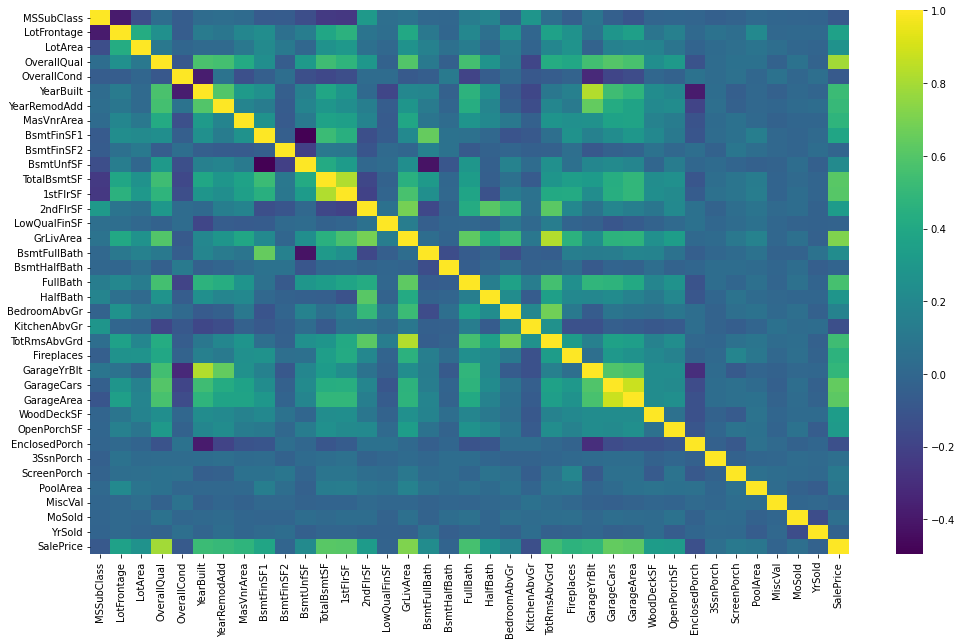

In [63]:
plt.figure(figsize=(17,10))
sns.heatmap(df.corr(),cmap='viridis') 

<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

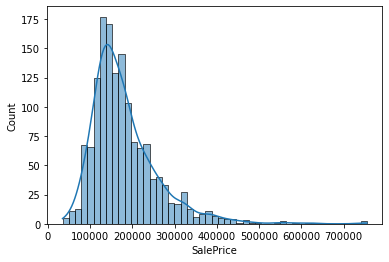

In [64]:
sns.histplot(data=df,x='SalePrice',kde=True)

From the plot we can find there are some outliers in the dat

In [65]:
df.nlargest(10,'SalePrice')
# First two large Values seems like abnormalities so we are removing them

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
691,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,755000
1182,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,Corner,...,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000
1169,60,RL,118.0,35760,Pave,NaN,IR1,Lvl,AllPub,CulDSac,...,0,NaN,NaN,NaN,0,7,2006,WD,Normal,625000
898,20,RL,100.0,12919,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,3,2010,New,Partial,611657
803,60,RL,107.0,13891,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,1,2009,New,Partial,582933
1046,60,RL,85.0,16056,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,7,2006,New,Partial,556581
440,20,RL,105.0,15431,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2009,WD,Normal,555000
769,60,RL,47.0,53504,Pave,NaN,IR2,HLS,AllPub,CulDSac,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,538000
178,20,RL,63.0,17423,Pave,NaN,IR1,Lvl,AllPub,CulDSac,...,0,NaN,NaN,NaN,0,7,2009,New,Partial,501837
798,60,RL,104.0,13518,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,7,2009,New,Partial,485000


In [66]:
df = df[df['SalePrice'] < 740000]

In [67]:
df.isnull().sum()

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 80, dtype: int64

Cant find all the details properly what values are null so i build a dataframe

In [68]:
def null_df(df=df):
    a=pd.DataFrame(df[df.columns[df.isnull().sum() > 0]].isnull().sum())
    a['type'] = df[df.columns[df.isnull().sum() > 0]].dtypes.values
    a.columns = ['Null_no','Type']
    a['Type'].apply(lambda num:str(num))
    return a
null_df()

# Dataframe with all columns having null values and thier type

,Null_no,Type
LotFrontage,259,float64
Alley,1367,object
MasVnrType,8,object
MasVnrArea,8,float64
BsmtQual,37,object
BsmtCond,37,object
BsmtExposure,38,object
BsmtFinType1,37,object
BsmtFinType2,38,object
Electrical,1,object


In [69]:
df['GarageYrBlt'].fillna(1980,inplace=True)
df['YearBuilt'].fillna(1973,inplace=True)
df['YearRemodAdd'].fillna(1994,inplace=True)
df['MoSold'].fillna(6,inplace=True)
df['YrSold'].fillna(2008,inplace=True)

# Replacing null value of the years with mode values of that particulat column data

In [70]:
null_df()

,Null_no,Type
LotFrontage,259,float64
Alley,1367,object
MasVnrType,8,object
MasVnrArea,8,float64
BsmtQual,37,object
BsmtCond,37,object
BsmtExposure,38,object
BsmtFinType1,37,object
BsmtFinType2,38,object
Electrical,1,object


From the above data frame only two values are float so i tried to replace all the null values with the help of corr matrix and rf model

In [71]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier


# Flaot columns that has null values i need to fill on
list_col = ['MasVnrArea','LotFrontage']

for item in list_col:
     
    # Getting the data frame that has no null values
    not_null = df[df[item].notnull()]
    
    #with the help of that df i built corr mx,and took best 5 columns
    train_df = not_null[df.corr()[item].sort_values(ascending=False).keys()[:5]]
    
    #trained and fit the data using Random forest
    X = train_df.drop(item,axis=1)
    y = train_df[item]
    rf_R_model = RandomForestRegressor()
    rf_C_model = RandomForestClassifier()
    rf_R_model.fit(X,y)
    
    # Getting the df of our null values of our column
    is_null = df[df[item].isnull()]
    test_df = is_null[df.corr()[item].sort_values(ascending=False).keys()[:5]]
    
    # Got the null values for our column using rf model
    X_test = test_df.drop(item,axis=1)
    y_results = rf_R_model.predict(X_test)
    
    # Getting all the indexes of null positions
    index_no = df[df[item].isnull()].index.tolist()
    
    #zipping them with with the index no and results
    result_dic = dict(zip(index_no,y_results.round(2)))
    
    # Filling them in the original places of the df
    for index in result_dic:
        df.at[index,item] = result_dic[index]

# we fill all the numbers in null values

Now all the null values with float type are filled

In [72]:
null_df()

,Null_no,Type
Alley,1367,object
MasVnrType,8,object
BsmtQual,37,object
BsmtCond,37,object
BsmtExposure,38,object
BsmtFinType1,37,object
BsmtFinType2,38,object
Electrical,1,object
FireplaceQu,690,object
GarageType,81,object


In [73]:
df['Electrical'].value_counts()

SBrkr    1332
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [74]:
df['Electrical'].fillna('SBrkr',inplace=True)
# Since SBrkr has highest instances compared to other i filled it

In [75]:
null_df()

,Null_no,Type
Alley,1367,object
MasVnrType,8,object
BsmtQual,37,object
BsmtCond,37,object
BsmtExposure,38,object
BsmtFinType1,37,object
BsmtFinType2,38,object
FireplaceQu,690,object
GarageType,81,object
GarageFinish,81,object


In [76]:
df['MiscFeature'].value_counts()

Shed    49
Gar2     2
Othr     2
TenC     1
Name: MiscFeature, dtype: int64

In [77]:
# since it seems like all MiscFeature are extras so we fill nun vaues with NONE
df['MiscFeature'].fillna('None',inplace=True)

In [78]:
null_df()

,Null_no,Type
Alley,1367,object
MasVnrType,8,object
BsmtQual,37,object
BsmtCond,37,object
BsmtExposure,38,object
BsmtFinType1,37,object
BsmtFinType2,38,object
FireplaceQu,690,object
GarageType,81,object
GarageFinish,81,object


In [79]:
# Since most poolQc values are not present we are droping it
df['PoolQC'].fillna('None',inplace=True)

In [80]:
null_df()

,Null_no,Type
Alley,1367,object
MasVnrType,8,object
BsmtQual,37,object
BsmtCond,37,object
BsmtExposure,38,object
BsmtFinType1,37,object
BsmtFinType2,38,object
FireplaceQu,690,object
GarageType,81,object
GarageFinish,81,object


In [81]:
df['GarageCond'].fillna('None',inplace=True)

In [82]:
null_df()

,Null_no,Type
Alley,1367,object
MasVnrType,8,object
BsmtQual,37,object
BsmtCond,37,object
BsmtExposure,38,object
BsmtFinType1,37,object
BsmtFinType2,38,object
FireplaceQu,690,object
GarageType,81,object
GarageFinish,81,object


In [83]:
df['Fence'].fillna('None',inplace=True)

In [84]:
null_df()

,Null_no,Type
Alley,1367,object
MasVnrType,8,object
BsmtQual,37,object
BsmtCond,37,object
BsmtExposure,38,object
BsmtFinType1,37,object
BsmtFinType2,38,object
FireplaceQu,690,object
GarageType,81,object
GarageFinish,81,object


In [85]:
df['GarageType'].fillna('None',inplace=True)
df['GarageFinish'].fillna('None',inplace=True)
df['GarageQual'].fillna('None',inplace=True)

In [86]:
null_df()

,Null_no,Type
Alley,1367,object
MasVnrType,8,object
BsmtQual,37,object
BsmtCond,37,object
BsmtExposure,38,object
BsmtFinType1,37,object
BsmtFinType2,38,object
FireplaceQu,690,object


In [87]:
df['Alley'].fillna('No_alley_access',inplace=True)

In [88]:
df.fillna('None',inplace=True)

In [89]:
null_df()

,Null_no,Type


In [90]:
# i discovered that there are some int values that are just type
df['MSSubClass'] = df['MSSubClass'].apply(lambda num:str(num))

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1458 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1458 non-null   object 
 1   MSZoning       1458 non-null   object 
 2   LotFrontage    1458 non-null   float64
 3   LotArea        1458 non-null   int64  
 4   Street         1458 non-null   object 
 5   Alley          1458 non-null   object 
 6   LotShape       1458 non-null   object 
 7   LandContour    1458 non-null   object 
 8   Utilities      1458 non-null   object 
 9   LotConfig      1458 non-null   object 
 10  LandSlope      1458 non-null   object 
 11  Neighborhood   1458 non-null   object 
 12  Condition1     1458 non-null   object 
 13  Condition2     1458 non-null   object 
 14  BldgType       1458 non-null   object 
 15  HouseStyle     1458 non-null   object 
 16  OverallQual    1458 non-null   int64  
 17  OverallCond    1458 non-null   int64  
 18  YearBuil

# Data cleaning part is over now ml part

In [92]:
X = pd.get_dummies(df.drop('SalePrice',axis=1),drop_first=True)
y = df['SalePrice']

In [93]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostRegressor,RandomForestRegressor,GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

scaler = StandardScaler()

scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [94]:
model_gbr = GradientBoostingRegressor()

In [95]:
param_grid = {
    'learning_rate' : [0.05,0.1,0.15],
    'max_depth' : [3,4,5],
    'n_estimators' : [69,100,124]
}

grid = GridSearchCV(estimator=model_gbr,param_grid=param_grid)

In [96]:
# model_ada.fit(scaled_X_train,y_train)
#model_rfr.fit(scaled_X_train,y_train)
#model_gbr.fit(X_train,y_train)
grid.fit(scaled_X_train,y_train)

GridSearchCV(estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.05, 0.1, 0.15],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [69, 100, 124]})

In [97]:
grid.best_params_

{'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 124}

In [98]:
tp = grid.predict(scaled_X_test)

In [99]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [100]:
MAE = mean_absolute_error(y_test,tp)

In [101]:
MAE

16139.383359171246

Since the label is a housing price in big amounts i find MAE and RMSE  reasonable

In [102]:
RMSE = mean_squared_error(y_test,tp)**0.5
RMSE

22180.542783409706

# Cleaning their test data

In [103]:
test_df = pd.read_csv('test.csv').drop(['Id'],axis=1)
i_d = list(pd.read_csv('test.csv')['Id'])

# I filled thr years with mode year
test_df['GarageYrBlt'].fillna(1980,inplace=True)
test_df['YearBuilt'].fillna(1973,inplace=True)
test_df['YearRemodAdd'].fillna(1994,inplace=True)
test_df['MoSold'].fillna(6,inplace=True)
test_df['YrSold'].fillna(2008,inplace=True)

In [104]:
null_df(df=test_df)

,Null_no,Type
MSZoning,4,object
LotFrontage,227,float64
Alley,1352,object
Utilities,2,object
Exterior1st,1,object
Exterior2nd,1,object
MasVnrType,16,object
MasVnrArea,15,float64
BsmtQual,44,object
BsmtCond,45,object


SO SO many values to fill

# Here i completley auto filled the data using null_df,correlation matrix and Random Forest

The code below fill the null values of type obj using the mode value of the column and null values of type float and int using corr matrix and rf model

In [105]:
df_test_null = null_df(df=test_df)
num_col=[]

# FIll the values of type obj with the mode of the column
for item in df_test_null.index:
    if df_test_null['Type'][item] == 'object':
        series=df[item].value_counts().keys()
        if 'None' in series:
            test_df[item].fillna('None',inplace=True)
        else:
            test_df[item].fillna(series[0],inplace=True)
    else:
        num_col.append(item)

# Filling the FLOAT values
for item in num_col:
    
    # index numbers of all the values of a column that need to fill
    index_no = test_df[test_df[item].isnull()].index.tolist()

    # df where there is no null values of that column
    not_null = df[df[item].notnull()]


    # columns that are correlated with our column
    corr_columns = df.corr()[item].sort_values(ascending=False).keys()[:6].tolist()
    if 'SalePrice' in corr_columns:
        corr_columns.remove('SalePrice')

    # creating dataframe withour column and correlated columns
    train_df = not_null[corr_columns]


    # Droping our column so it become a label and remaining columns becomes features
    X = train_df.drop(item,axis=1)
    y = train_df[item]

    # creating ml models and fitting them
    rf_R_model = RandomForestRegressor(n_estimators=75)
    rf_C_model = RandomForestClassifier(n_estimators=75)
    rf_R_model.fit(X,y)
    is_null = test_df[test_df[item].isnull()]
    te_df = is_null[corr_columns]
    X_test = te_df.drop(item,axis=1)
    X_test.fillna(0,inplace=True)
    y_results = rf_R_model.predict(X_test)

    # creating a dictionary with indexno and thier values
    result_dic = dict(zip(index_no,y_results.round(2)))

    # adding our predicted values to original df
    for index in result_dic:
            test_df.at[index,item] = result_dic[index]
            
            
    print(f"{item} is successfully updated")

LotFrontage is successfully updated
MasVnrArea is successfully updated
BsmtFinSF1 is successfully updated
BsmtFinSF2 is successfully updated
BsmtUnfSF is successfully updated
TotalBsmtSF is successfully updated
BsmtFullBath is successfully updated
BsmtHalfBath is successfully updated
GarageCars is successfully updated
GarageArea is successfully updated


In [106]:
test_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,No_alley_access,Reg,Lvl,AllPub,Inside,...,120,0,None,MnPrv,None,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,No_alley_access,IR1,Lvl,AllPub,Corner,...,0,0,None,None,Gar2,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,No_alley_access,IR1,Lvl,AllPub,Inside,...,0,0,None,MnPrv,None,0,3,2010,WD,Normal
3,60,RL,78.0,9978,Pave,No_alley_access,IR1,Lvl,AllPub,Inside,...,0,0,None,None,None,0,6,2010,WD,Normal
4,120,RL,43.0,5005,Pave,No_alley_access,IR1,HLS,AllPub,Inside,...,144,0,None,None,None,0,1,2010,WD,Normal


In [107]:
test_df['MSSubClass'] = test_df['MSSubClass'].apply(lambda num:str(num))

# CHANGING mssubclass to obj

# Now doing the final run

In [108]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostRegressor,RandomForestRegressor,GradientBoostingRegressor
from sklearn.svm import SVR

X_train = pd.get_dummies(df.drop('SalePrice',axis=1),drop_first=True)
y_train = df['SalePrice']
X_test = pd.get_dummies(test_df,drop_first=True)

In [109]:
# i checked the not_values column and copy pasted here
not_values=['Utilities_NoSeWa', 'Condition2_RRAe', 'Condition2_RRAn', 'Condition2_RRNn', 'HouseStyle_2.5Fin', 'RoofMatl_CompShg', 'RoofMatl_Membran', 'RoofMatl_Metal', 'RoofMatl_Roll', 'Exterior1st_ImStucc', 'Exterior1st_Stone', 'Exterior2nd_Other', 'Heating_GasA', 'Heating_OthW', 'Electrical_Mix', 'GarageQual_Fa', 'PoolQC_Fa', 'MiscFeature_TenC']
for item in not_values:
    X_test[item] = 0
X_test.drop(['MSSubClass_150'],axis=1,inplace=True)
column_order = X_train.columns.to_list()
X_test = X_test[column_order]

In [110]:
# scaler = StandardScaler()

# scaled_X_train = scaler.fit_transform(X_train)
# scaled_X_test = scaler.transform(X_test)

In [111]:
model_gbr = GradientBoostingRegressor()

In [112]:
 param_grid = {

     'learning_rate' : [0.05,0.1,0.15],
     'n_estimators' : [64,100,125,150],
     'max_features' : ['auto', 'sqrt', 'log2'],
    
 }

grid = GridSearchCV(estimator=model_gbr,param_grid=param_grid)

In [113]:
grid.fit(X_train,y_train)

GridSearchCV(estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.05, 0.1, 0.15],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [64, 100, 125, 150]})

In [114]:
grid.best_params_

{'learning_rate': 0.1, 'max_features': 'auto', 'n_estimators': 150}

In [115]:
test_predictions = grid.predict(X_test)

In [116]:
output = pd.DataFrame({'Id': i_d, 'SalePrice': test_predictions})

In [117]:
output.to_csv('submission.csv',index=False)

I tried all the models but GRADIENT BOOSTING with GRID SEARCH gave me best results